11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
375/375 [==============================] - 12s 6ms/step - loss: 0.3156 - accuracy: 0.9067 - val_loss: 0.1029 - val_accuracy: 0.9701
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9735 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0682 - val_accuracy: 0.9789
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0499 - val_accuracy: 0.9855
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


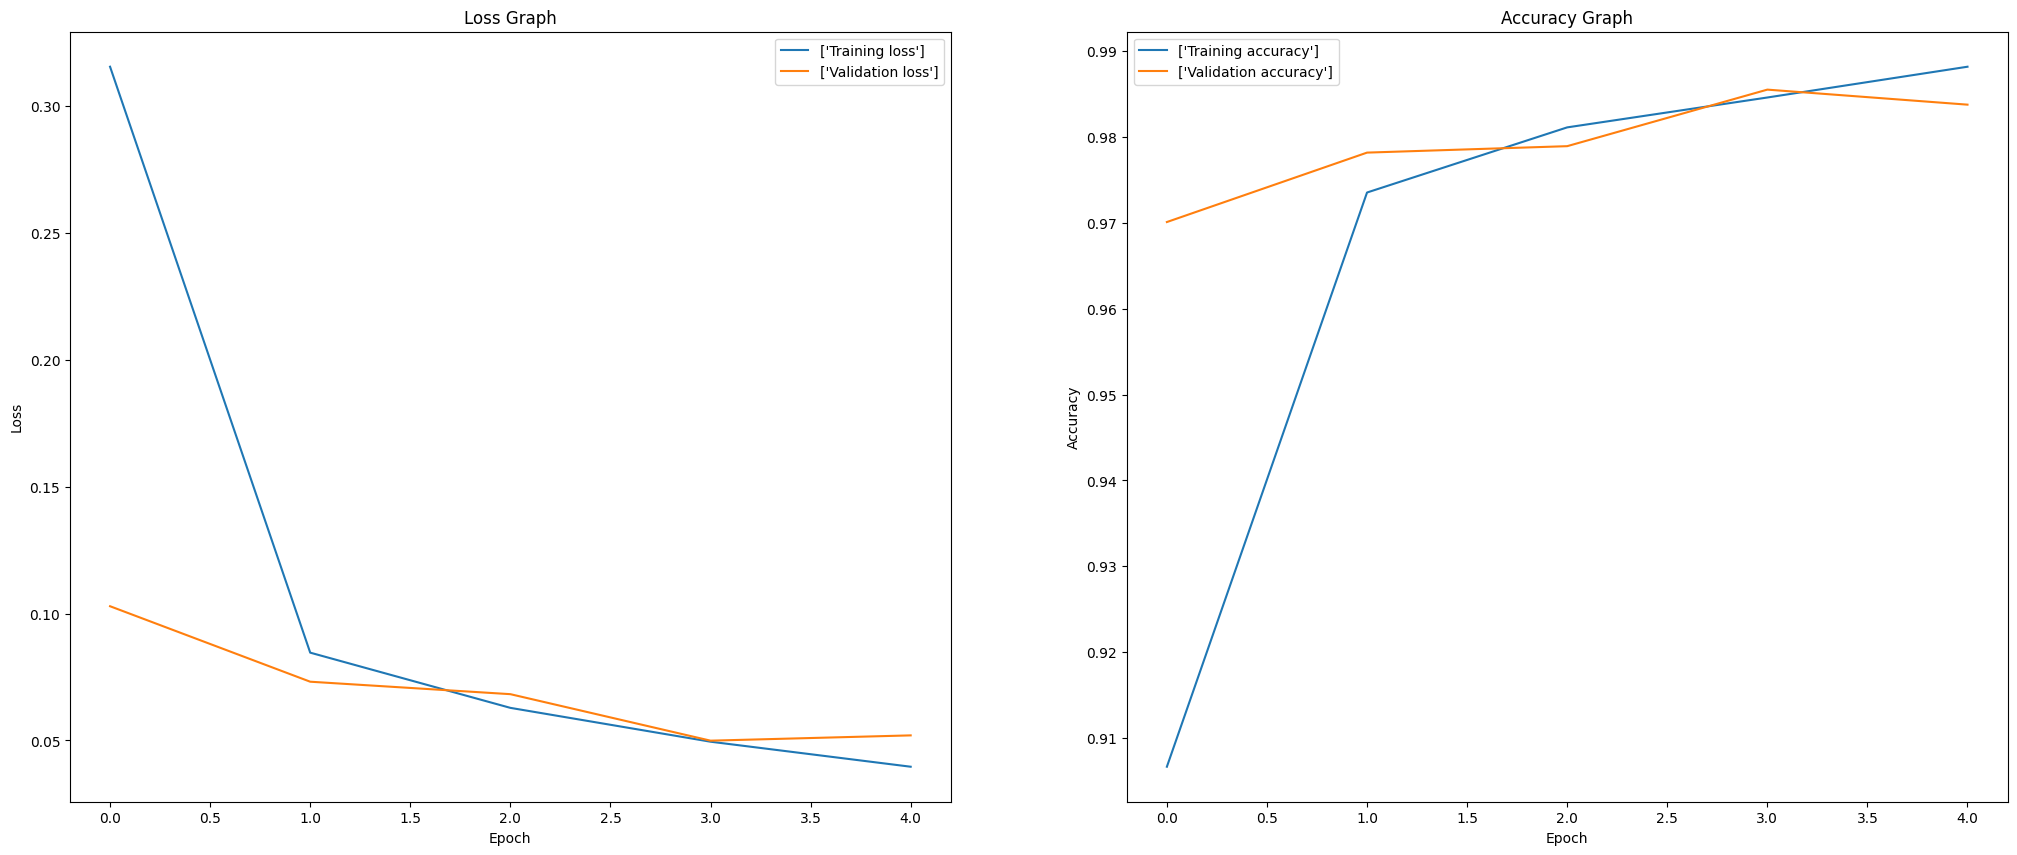

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten

(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,test_size=0.2)


model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

out = model.fit(xtrain,ytrain,validation_data = (xval,yval),epochs=5,batch_size=128,verbose=1)

ypred = model.predict(xtest)

fig,ax = plt.subplots(1,2,figsize=(25,10))
ax[0].plot(out.history['loss'],label = ["Training loss"])
ax[0].plot(out.history['val_loss'],label = ["Validation loss"])
ax[0].set_title('Loss Graph')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(out.history['accuracy'],label = ["Training accuracy"])
ax[1].plot(out.history['val_accuracy'],label = ["Validation accuracy"])
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

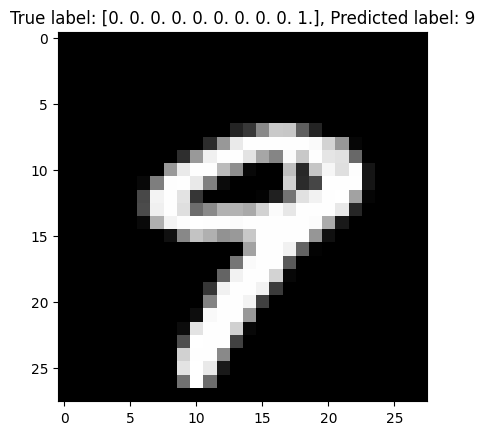

In [11]:

plt.imshow(xtest[x].reshape(28, 28), cmap='gray')
plt.title(f"True label: {ytest[x]}, Predicted label: {np.argmax(ypred[x], axis=0)}")
plt.show()

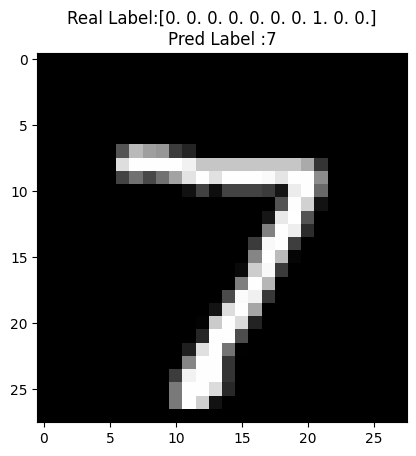

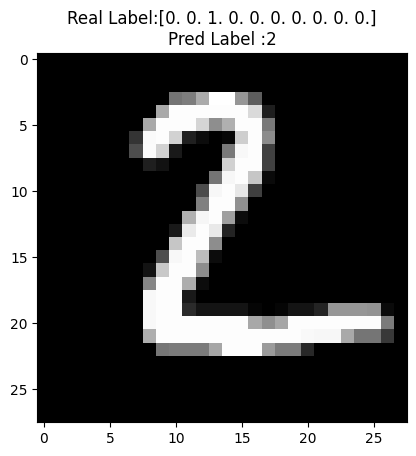

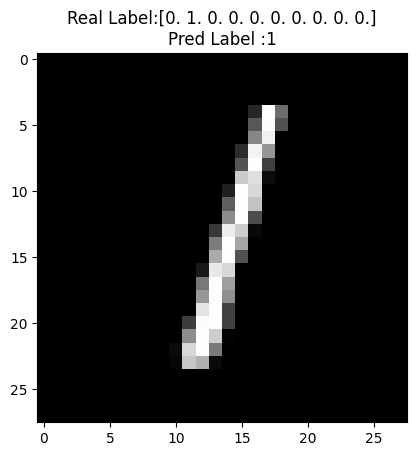

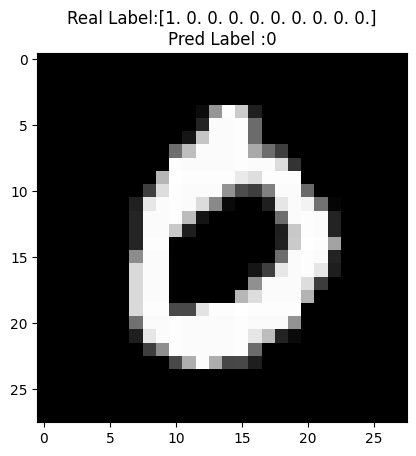

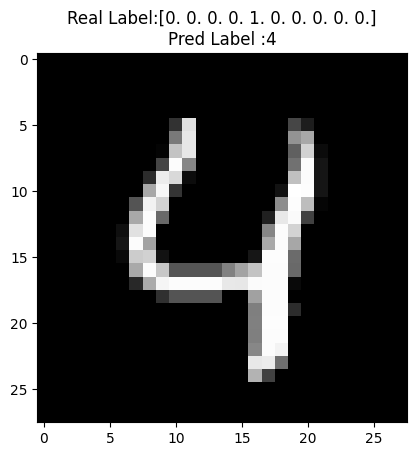

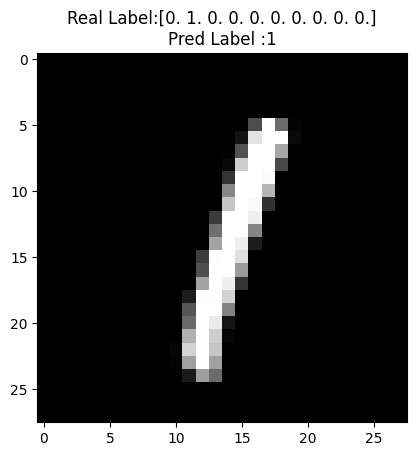

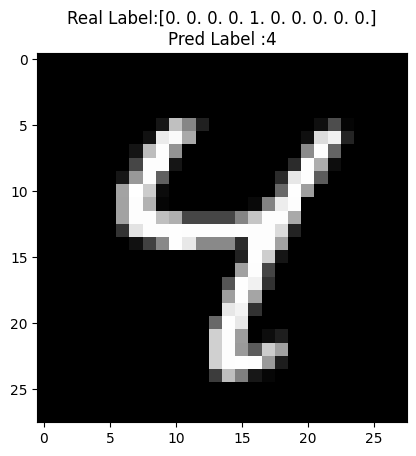

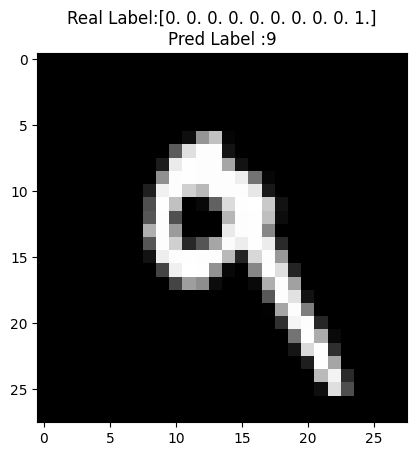

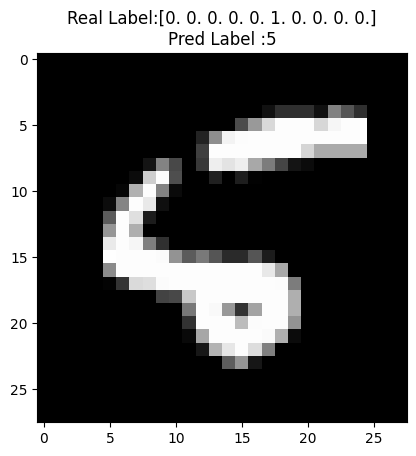

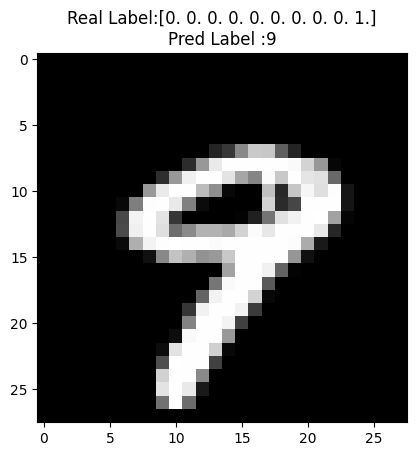

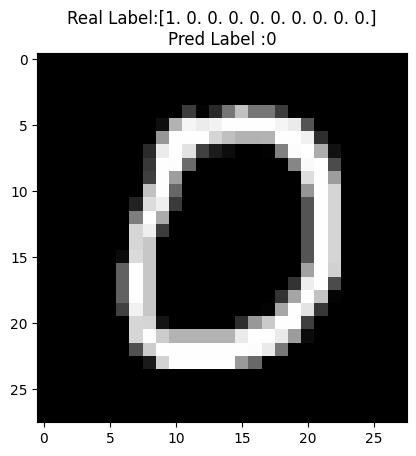

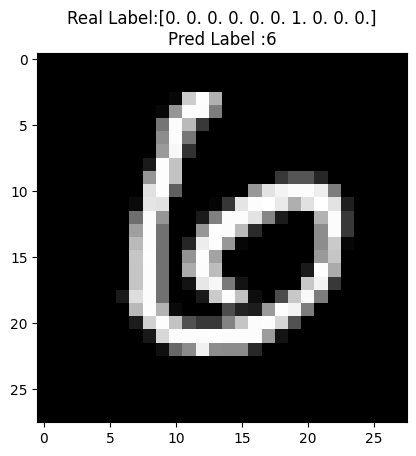

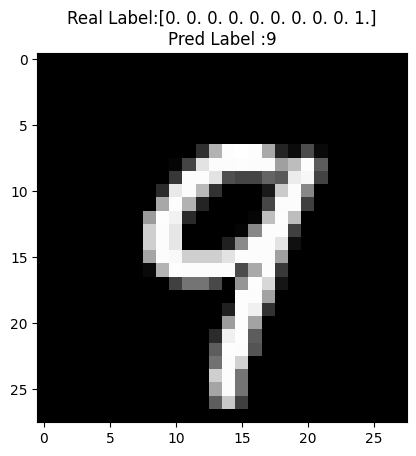

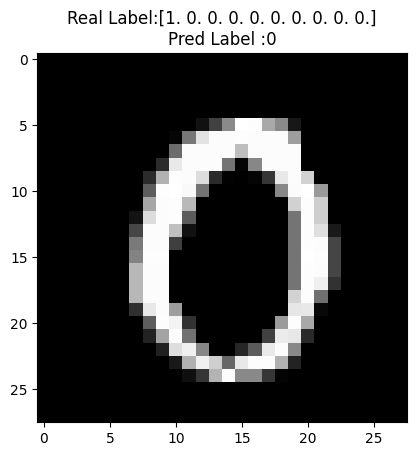

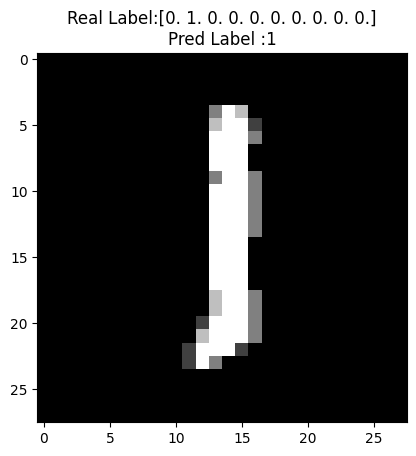

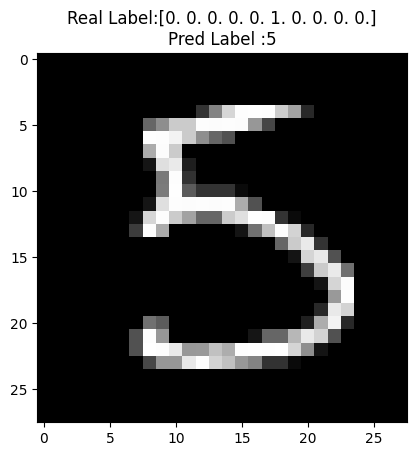

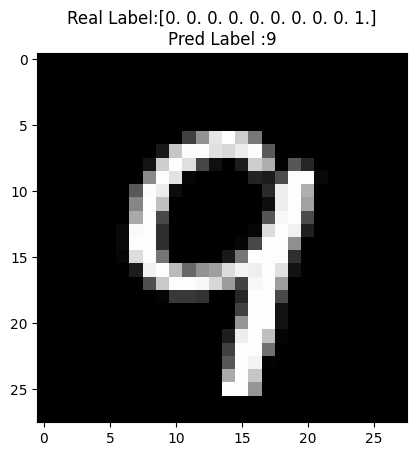

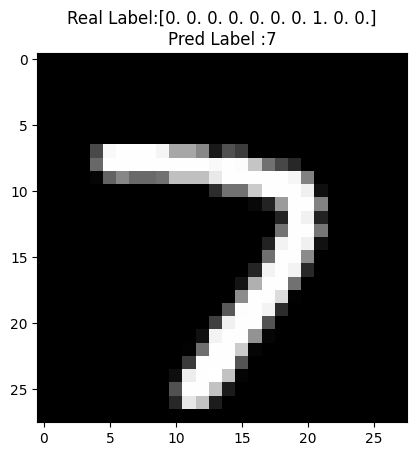

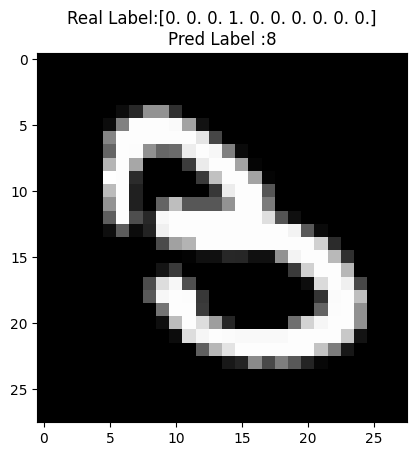

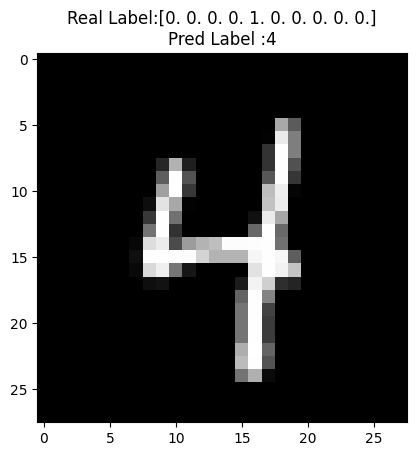

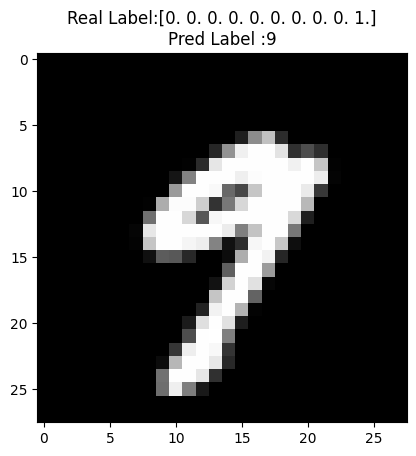

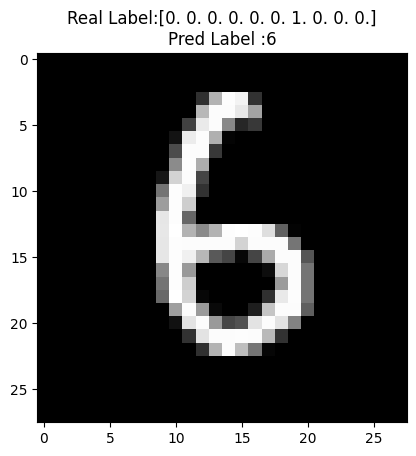

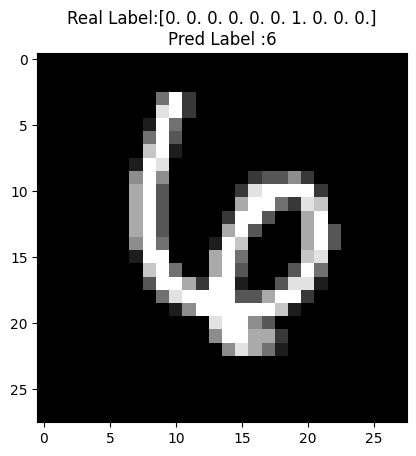

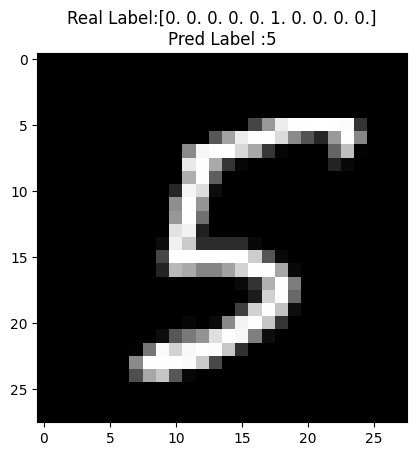

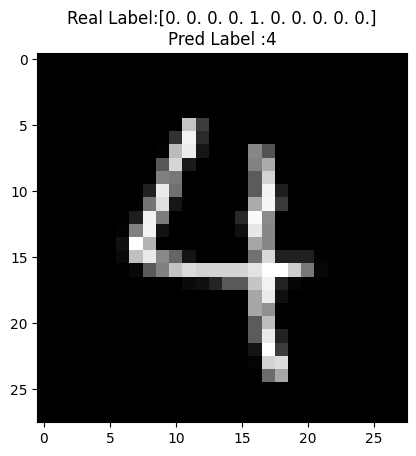

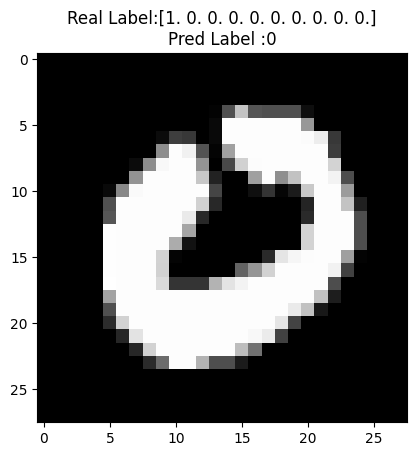

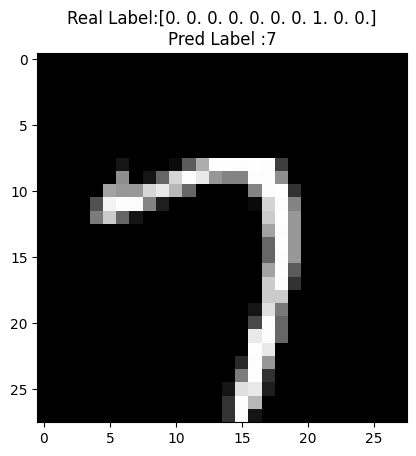

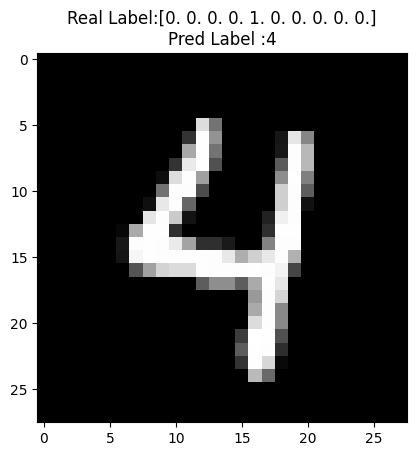

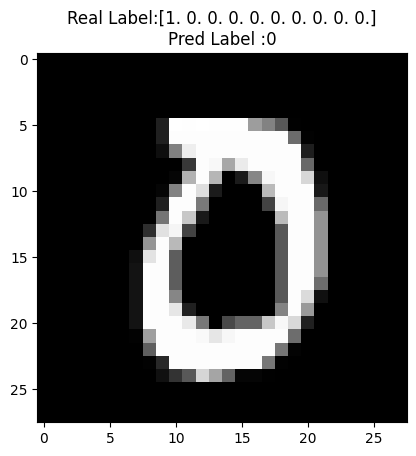

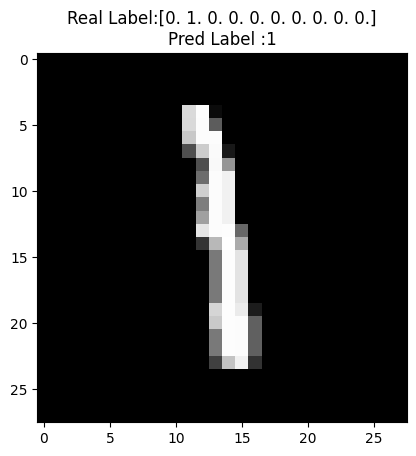

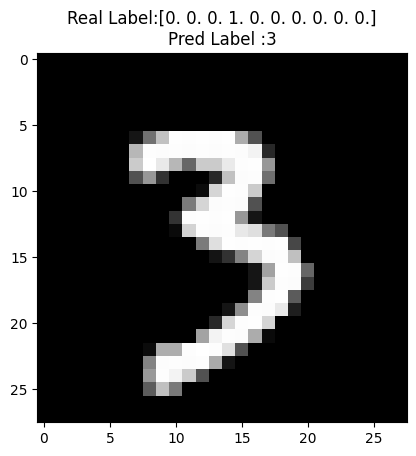

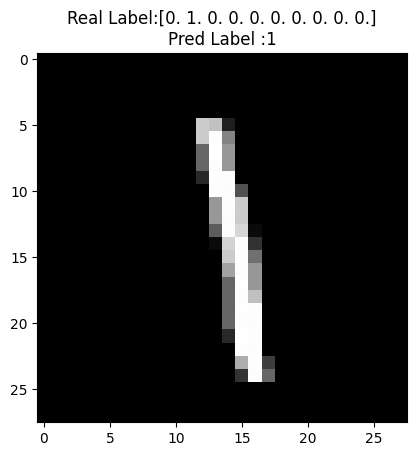

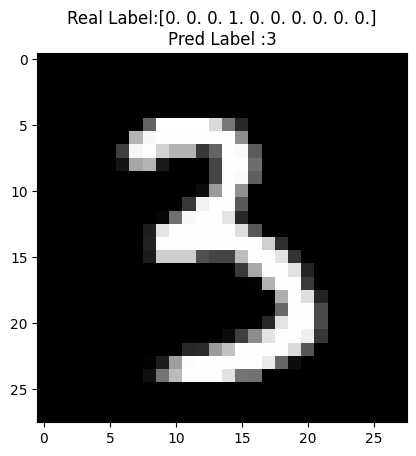

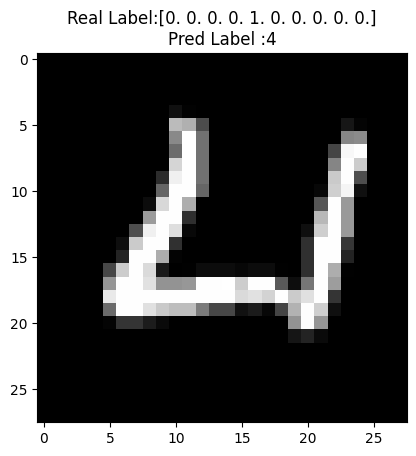

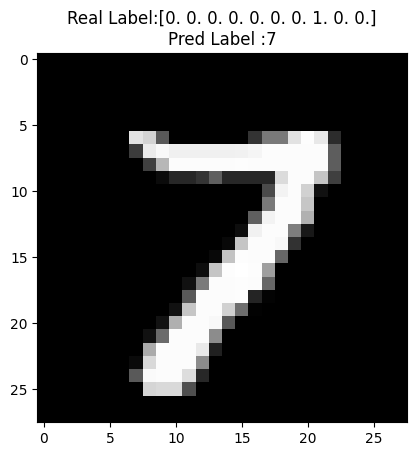

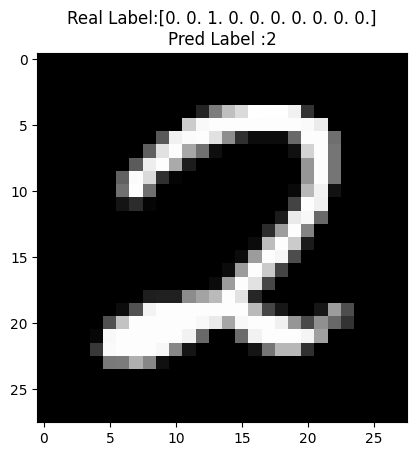

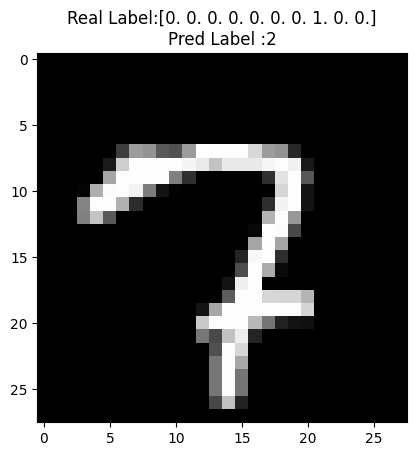

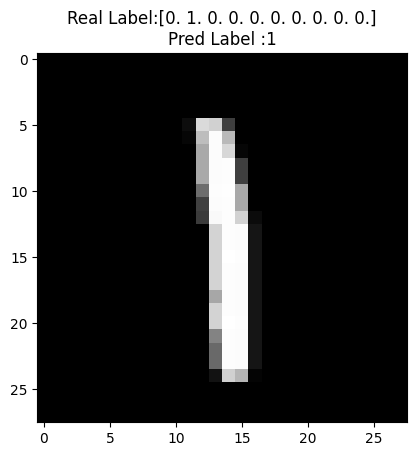

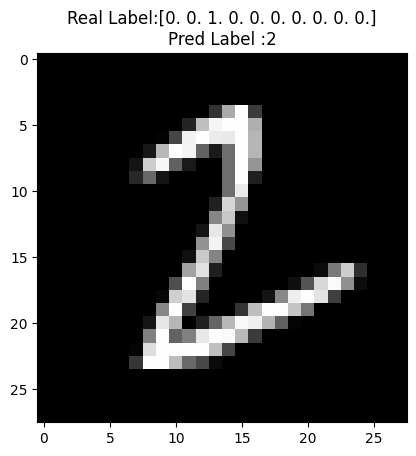

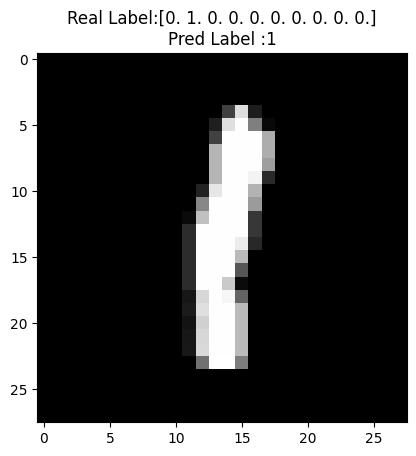

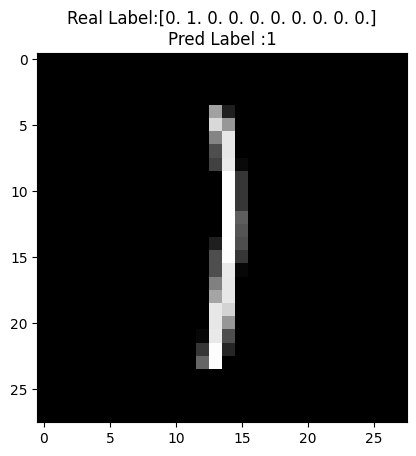

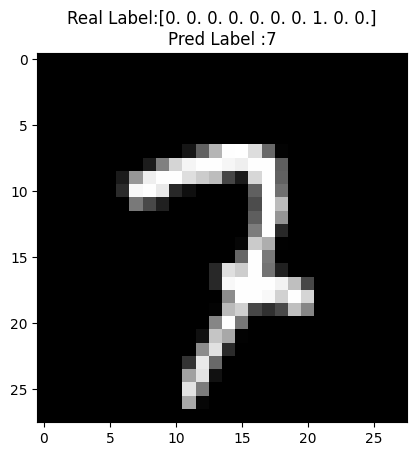

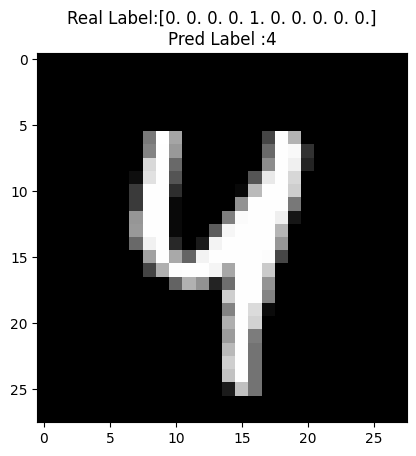

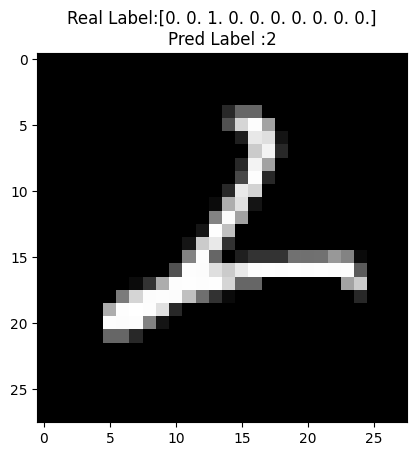

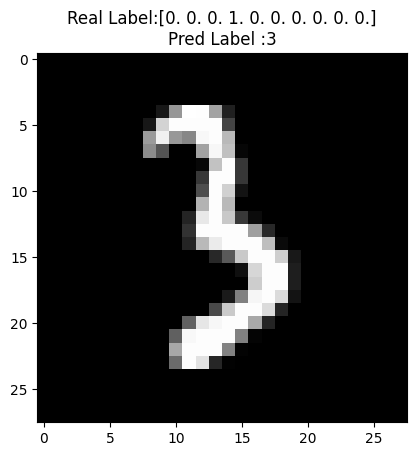

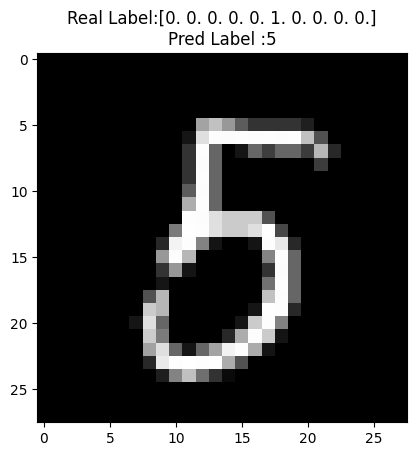

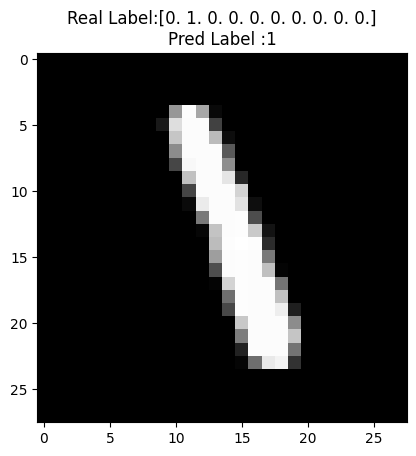

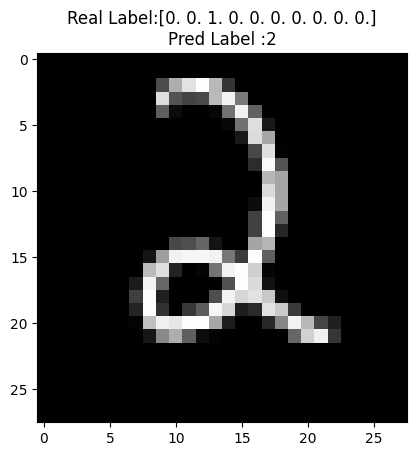

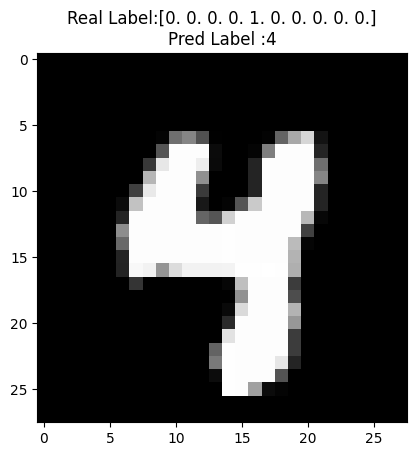

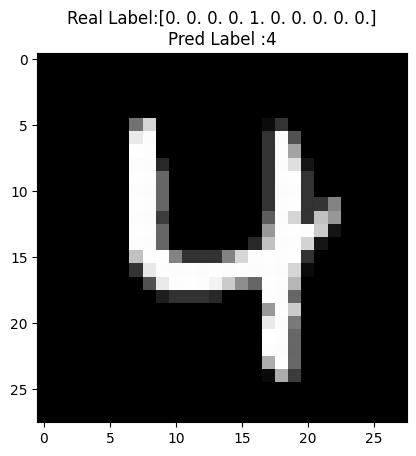

In [14]:
for i in range(50):
  plt.imshow(xtest[i].reshape(28,28),cmap='gray')
  plt.title('Real Label:{}\nPred Label :{}'.format(ytest[i],np.argmax(ypred[i])))
  plt.show()